<a href="https://colab.research.google.com/github/HMMK99/Deep_Learning_Bootcamp/blob/master/DPhi(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

loading liberaries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

loading the dataset


In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (_, __) = load_data()

170500096/170498071 [==============================] - 11s 0us/step


loading the test data


In [ ]:
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

In [ ]:
test_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,3032,3033,3034,3035,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,3046,3047,3048,3049,3050,3051,3052,3053,3054,3055,3056,3057,3058,3059,3060,3061,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,98,105,108,92,101,106,91,101,107,93,104,108,89,100,104,88,99,103,90,101,106,95,105,110,99,108,110,109,117,116,119,125,123,125,130,128,134,140,138,140,...,184,178,177,172,190,188,184,220,219,214,195,193,187,176,174,169,175,173,168,192,189,185,185,182,178,168,165,161,178,176,171,183,182,176,175,175,168,181,181,175
1,101,108,101,101,108,101,102,109,102,103,110,103,105,112,104,105,114,109,105,116,112,106,115,110,108,115,108,107,115,107,104,115,106,104,116,108,108,119,115,108,...,149,153,159,164,132,140,142,134,144,145,112,119,118,108,115,111,114,124,122,106,118,116,101,113,108,100,111,102,99,110,103,100,109,104,100,109,103,100,109,102
2,85,115,27,63,90,25,37,66,15,69,93,49,40,52,36,18,24,18,31,38,27,79,91,61,104,117,78,72,84,52,68,79,52,122,131,85,104,113,67,77,...,139,174,188,139,182,198,150,179,194,147,175,186,142,187,195,158,176,191,142,169,190,132,177,193,144,180,189,147,175,190,141,172,193,136,173,192,138,179,192,149
3,213,213,214,215,214,218,220,218,226,223,221,233,226,225,231,225,226,223,223,223,223,227,226,231,229,228,236,229,228,236,230,229,236,228,227,235,227,226,234,225,...,20,111,41,28,111,63,60,120,92,98,138,117,129,153,140,158,172,161,187,188,174,205,195,182,212,199,185,216,197,186,216,193,194,209,201,204,216,203,201,237
4,41,74,144,41,75,139,41,75,139,41,74,144,39,76,140,37,79,130,38,77,135,40,75,142,43,72,145,47,71,146,47,73,140,43,75,140,39,77,143,37,...,149,42,71,135,43,72,125,42,72,122,51,72,117,64,70,109,65,72,99,53,76,113,35,75,136,30,81,140,34,79,133,41,77,130,44,75,133,42,73,144


deviding the train_set to train & validation

[8]


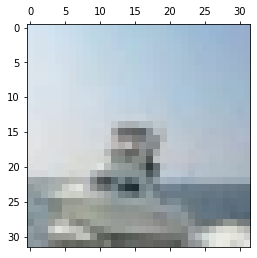

In [ ]:
plt.matshow(x_train[100])
print(y_train[100])


preprocessing 

In [ ]:
x_train = x_train / 255


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_trainre = x_train.reshape(50000, 3072)


In [ ]:
x_trainre.shape

(50000, 3072)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_trainee = to_categorical(y_train, 10)


In [ ]:
y_trainee.shape

(50000, 10)

defining the module

In [ ]:
from tensorflow.keras import Sequential    # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPool2D  # import Dense from tensorflow.keras.layers
from numpy.random import seed     # seed helps you to fix the randomness in the neural network.  
import tensorflow
from tensorflow.keras import regularizers

In [ ]:
shapee = x_trainre.shape[1]
shapee

3072

**model 2**

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size = 3, activation="relu", input_shape = (32,32,3)))
model.add(Flatten())
model.add(Dense(10, 'softmax'))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard
from datetime import datetime

logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model = Sequential()
model.add(Dense(2048,activation='relu', input_shape=(shapee, ),))
model.add(Dropout(0.1)) ###using dropout
model.add(Dense(1024,activation='relu', kernel_regularizer ="l2"))
model.add(Dropout(0.05)) ###using dropout
model.add(Dense(1024,activation='relu', kernel_regularizer ="l2"))

model.add(Dense(512,activation='relu', kernel_regularizer ="l2"))
model.add(Dropout(0.05)) ###using dropout
model.add(Dense(10, activation= 'softmax'))
#BEST============

In [ ]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
dropout_41 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_79 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_42 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_80 (Dense)             (None, 1024)              1049600   
_________________________________________________________________
dense_81 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_43 (Dropout)         (None, 512)             

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
#seed_value = 42
#seed(seed_value)        # If you build the model with given parameters, set_random_seed will help you produce the same result on multiple execution


# Recommended by Keras -------------------------------------------------------------------------------------
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
#import os
#os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
#import random
#random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
#import numpy as np
#np.random.seed(seed_value)
# Recommended by Keras -------------------------------------------------------------------------------------


# 4. Set the `tensorflow` pseudo-random generator at a fixed value
#tensorflow.random.set_seed(seed_value) 
history = model.fit(x_trainre, y_trainee, validation_split=0.2, epochs=200, batch_size=1024, verbose = 1, callbacks=[tensorboard_callback, es],)

Epoch 1/200
19/40 [=============>................] - ETA: 16s - loss: 2.1106 - accuracy: 0.3614

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

NameError: ignored

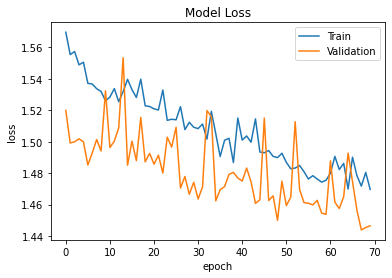

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'])
plt.show()

In [ ]:
new_test_data = test_data

In [ ]:
target = model.predict(test_data)


In [ ]:
target = model.predict(test_data)

targ = np.argmax(target, axis = 1).tolist()

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(targ) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_resultsee.csv')         
files.download('prediction_resultsee.csv')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>